In [1]:
import pandas as pd
import numpy as np


In [2]:
data_path = "../Extracted_data/AmesHousing.csv"
df = pd.read_csv(data_path)

In [6]:
from basic_data_inspection import DataInspector, DataInspectionStrategy, DatatypesInspectionStrategy, SummaryStatisticsInspection

data_inspector = DataInspector(DatatypesInspectionStrategy())
data_inspector.execute_strategy(df)


 data types and non-null counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-n

In [7]:
data_inspector.set_strategy(SummaryStatisticsInspection())
data_inspector.execute_strategy(df)


 summary statistics - numerical columns
            Order           PID  ...      Yr Sold      SalePrice
count  2930.00000  2.930000e+03  ...  2930.000000    2930.000000
mean   1465.50000  7.144645e+08  ...  2007.790444  180796.060068
std     845.96247  1.887308e+08  ...     1.316613   79886.692357
min       1.00000  5.263011e+08  ...  2006.000000   12789.000000
25%     733.25000  5.284770e+08  ...  2007.000000  129500.000000
50%    1465.50000  5.354536e+08  ...  2008.000000  160000.000000
75%    2197.75000  9.071811e+08  ...  2009.000000  213500.000000
max    2930.00000  1.007100e+09  ...  2010.000000  755000.000000

[8 rows x 39 columns]

 summary statistics - categorical columns
       MS Zoning Street Alley  ... Misc Feature Sale Type Sale Condition
count       2930   2930   198  ...          106      2930           2930
unique         7      2     2  ...            5        10              6
top           RL   Pave  Grvl  ...         Shed       WD          Normal
freq        2273

# target variable saleprice has mean of 180796 with the std 79886 , indicating significant spread
# overall qual ranges from 1 to 10 with means of 6.09 , showing relatively high quality on avgs
# year built ranges from 1872 to 2010 , indicating dataset has both very old and new houses 
# lot area has wide range , with some extreme outliers which might indicate large properties
# distribution of Gr Liv Area shows a means of 1499 sq ft with wide range which could significantly impact Saleprice
# 
# Neighbourhood has 28 unique values, with NAmes being most common, might dominate dataset
# MS Zoning , 7 unique zoning values
# Alley has high frequency of missing values 


 missing values 
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

 visualizing missing values


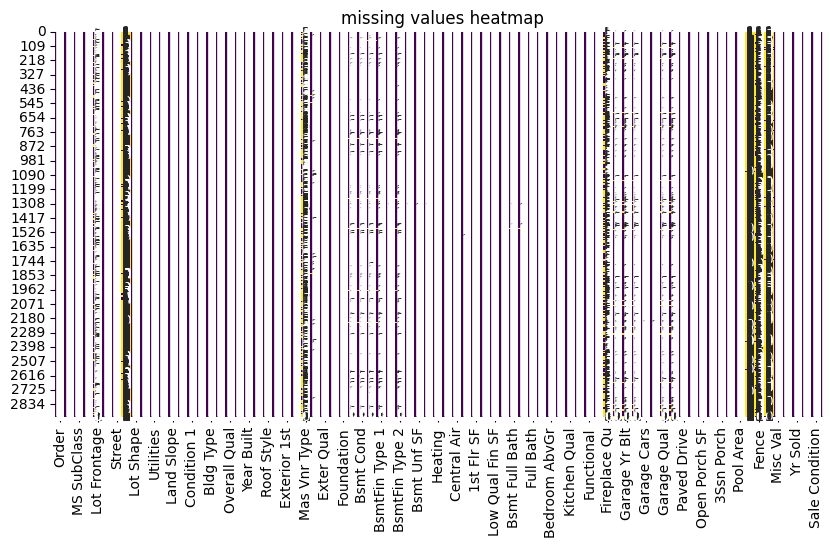

In [8]:

from missing_values import SimpleMissingValues

analyzer = SimpleMissingValues()
analyzer.analyze(df)

# hear color represents missing values and whites represents normal values 
# undertanding the distribution of missing data

# univeriate analysis numerical distribution plot 



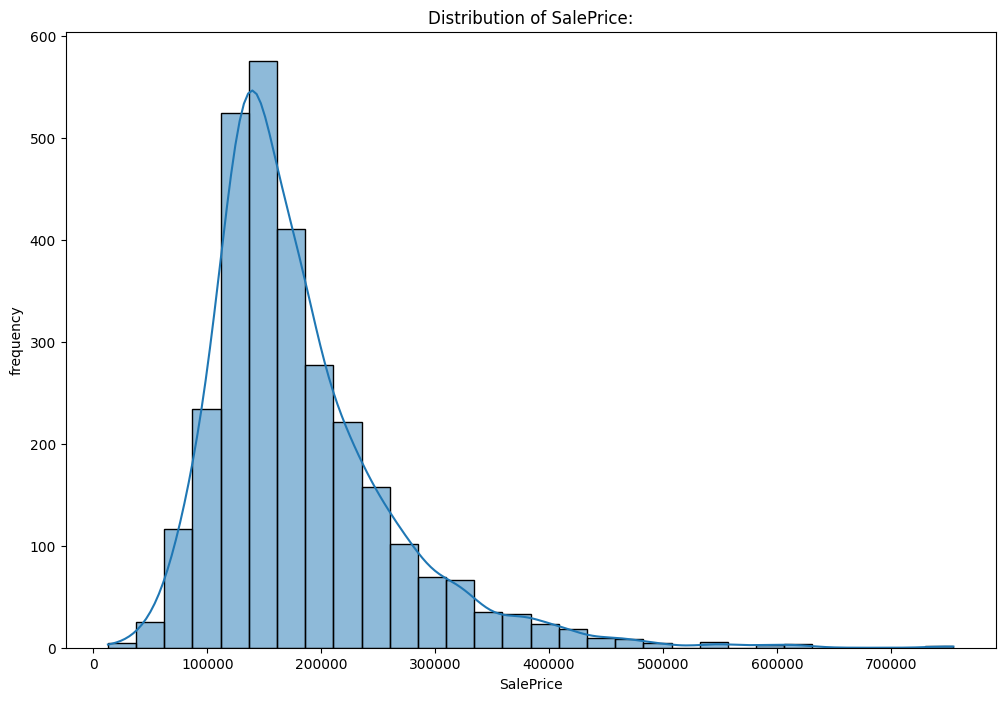

None


In [6]:
from univeriate_analysis import UniveriateAnalyzer , NumericalUniveriateAnalysis 
from univeriate_analysis import CategoricalUniveriateAnalysis

univeriate_analyzer = UniveriateAnalyzer(NumericalUniveriateAnalysis())

result = univeriate_analyzer.execute_strategy(df, 'SalePrice')
print(result)

# distribution of saleprice is positively skewed majority of house price falling between 100,000 and 250,000 


c:\paras ml\ML-House-Price-Prediction\Analysis\univeriate_analysis.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df , palette='muted')


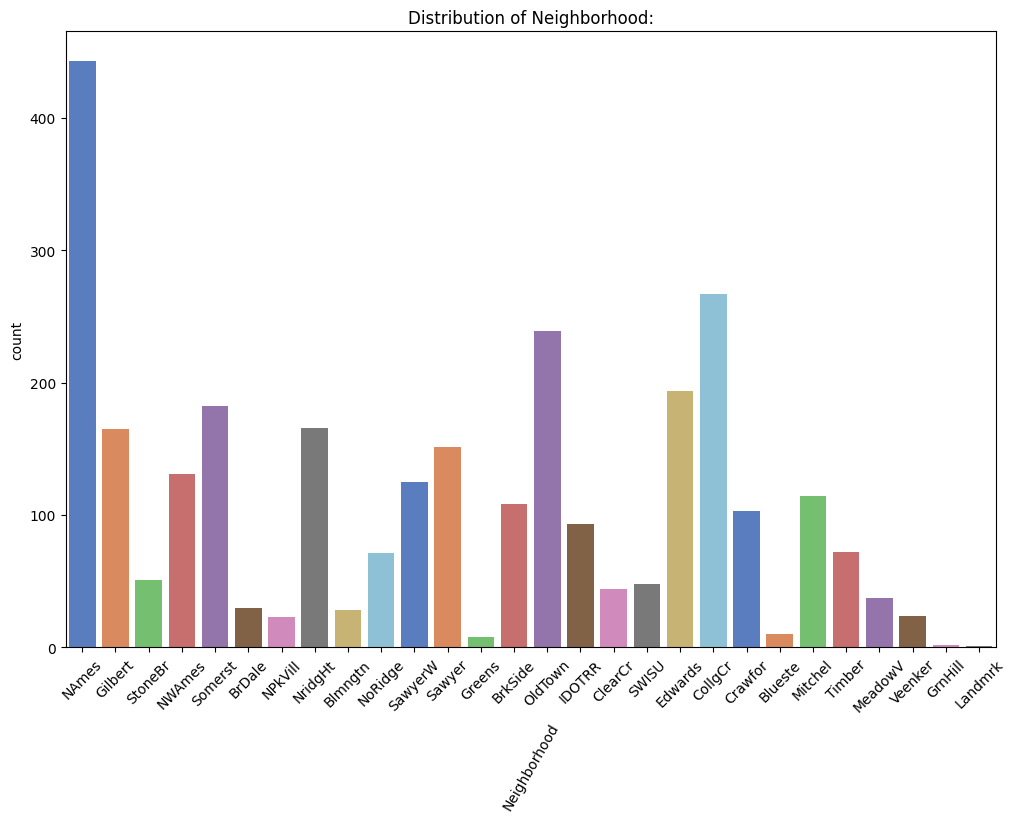

In [7]:
univeriate_analyzer.set_strategy(CategoricalUniveriateAnalysis())
result = univeriate_analyzer.execute_strategy(df, 'Neighborhood')

# NAmes beings most common neighborhood , followed by collgcr and OldTown , high frequency of certain neighborhood suggest that this areas could significantly influence overall housing price

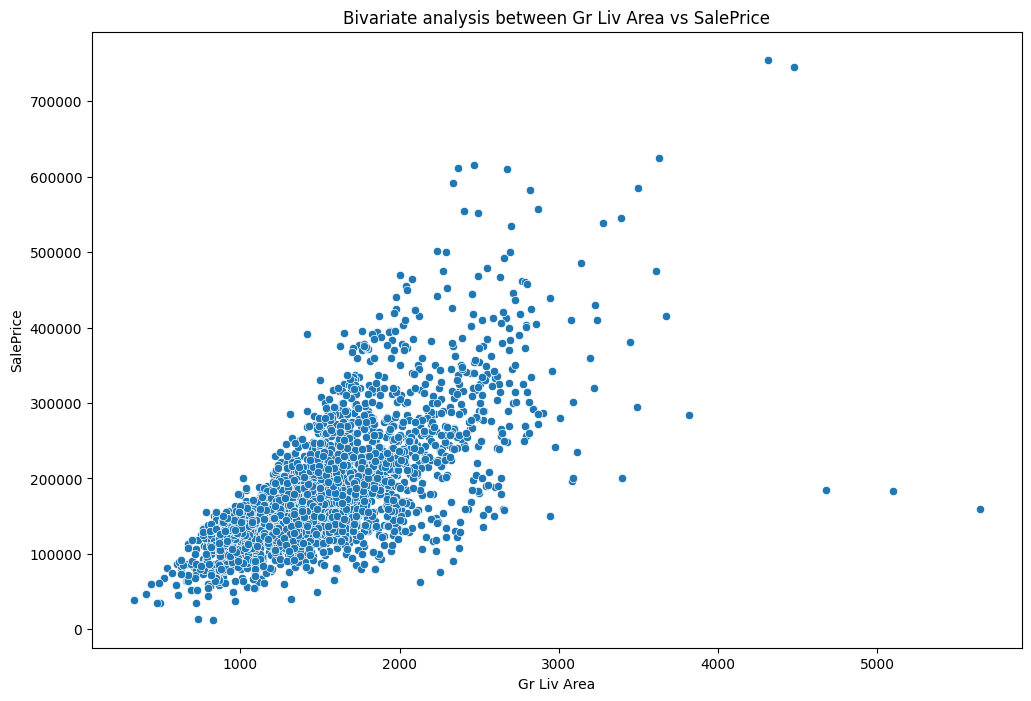

None


In [3]:
from bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalBivariateAnalysis, CategoricalVsNumericalBivariateAnalysis

bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalBivariateAnalysis())

result = bivariate_analyzer.execute_strategy(df, 'Gr Liv Area', 'SalePrice')
print(result)

# here strong positive correlation between Gr Liv Area and SalePrice indicating larger homes sale for higher price 
# linear relation confirms Gr Liv Area is likely strong predictor of Saleprice 
# but also have outliers 

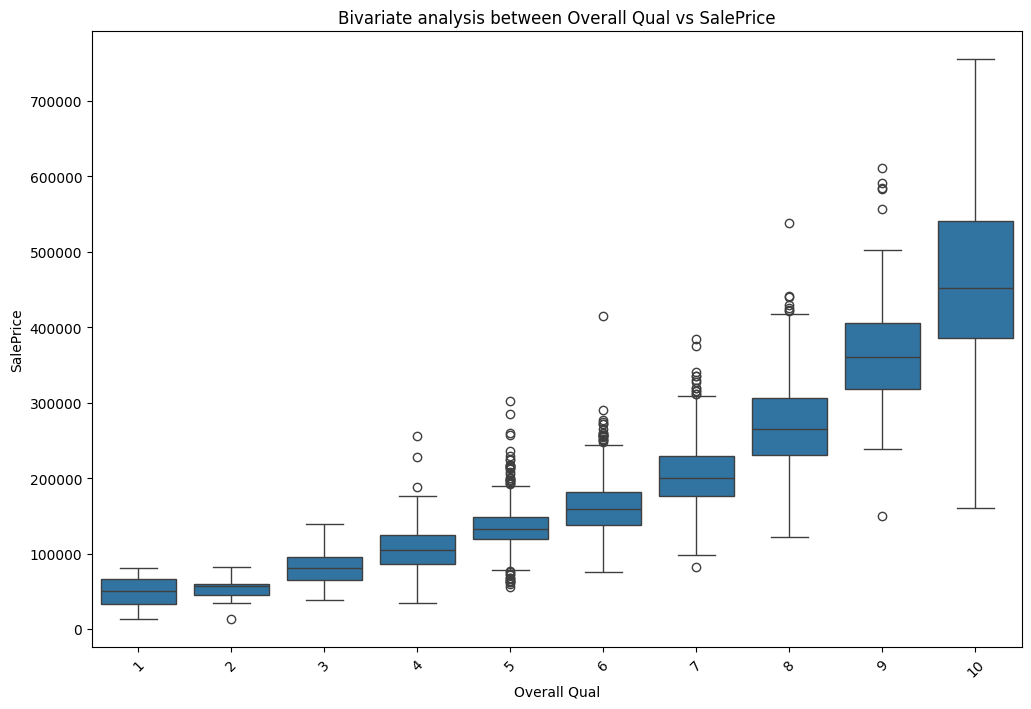

None


In [4]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalBivariateAnalysis())
result = bivariate_analyzer.execute_strategy(df, 'Overall Qual', 'SalePrice')
print(result)

outliers are also need to examine closely


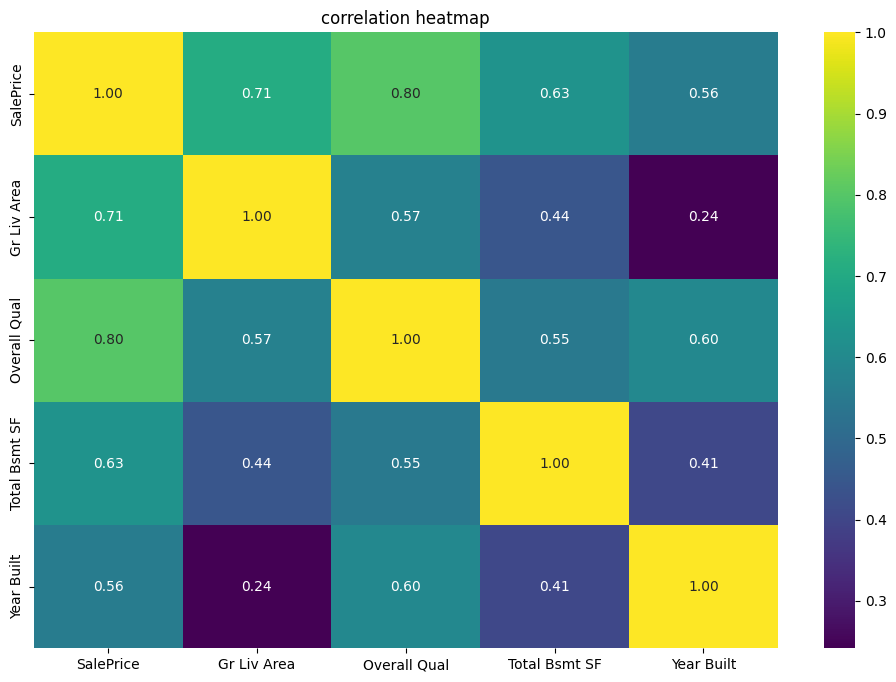

<Figure size 1200x800 with 0 Axes>

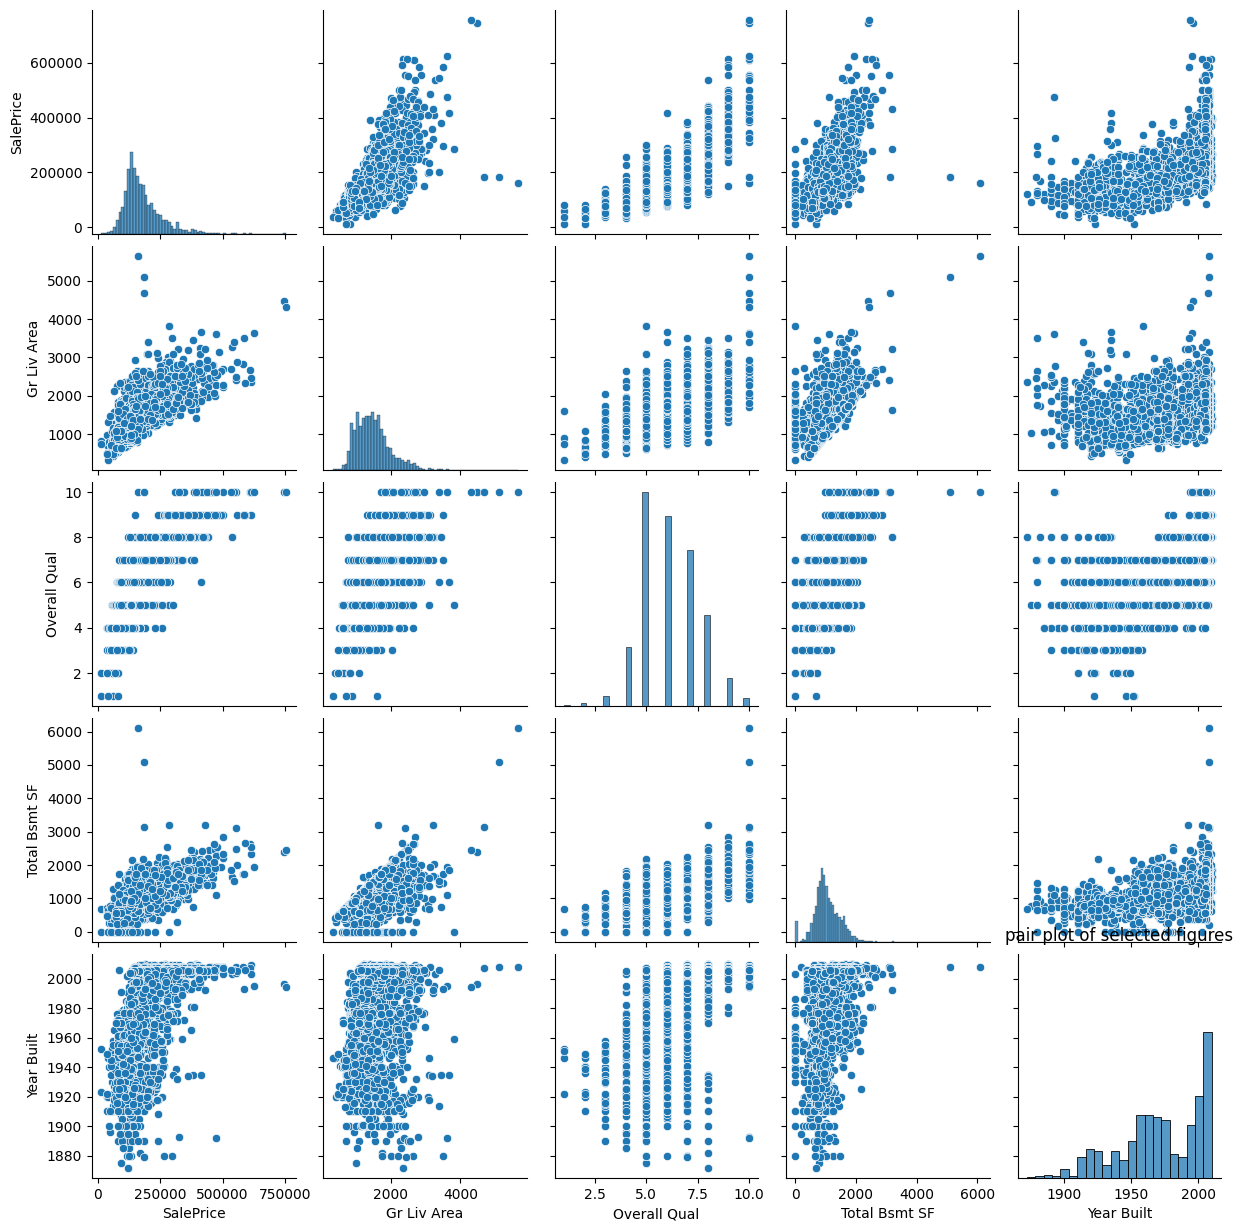

In [4]:
# multivariate analysis
from multivariate_analysis import MultivariateAnalysis , SimpleMultiveriateAnalysis
multivariate_analyzer = SimpleMultiveriateAnalysis()
selected_features = df[['SalePrice','Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built']]
multivariate_analyzer.analyze(selected_features)